1950 to 1959  top five finishers and the fastest lap setter were awarded points  
1960 to 2002  top six finishers but with no points for the fastest lap   
2003 to 2009  top eight finishers, no points for fastest lap  
2010 to 2018 top ten finishers  
2019 to preesnt - 1 point for the fastest lap reintroduced  
2021 to present  Sprint races were added with points awarded for the first eight finishers  


https://www.planetf1.com/news/f1-points-all-time-rankings  
https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems  
https://www.motorsport.com/f1/news/f1-to-drop-point-for-fastest-lap-after-2024-season/10663520/#:~:text=From%20next%20year%2C%20F1%20will,something%20extra%20to%20race%20for.  

In [4]:
import matplotlib.pyplot as plt
from pathlib import Path
import xml.etree.ElementTree as ET
import pandas as pd


In [ ]:

xml_path = Path("PointsData.xml")  # <-- your file
tree = ET.parse(xml_path)
root = tree.getroot()

# helper method extract namespace (if present)
def get_ns(tag: str) -> str:
    return tag.split("}")[0].strip("{") if "}" in tag else ""

ns = get_ns(root.tag)
N = {"n": ns} if ns else {}

rows = []

# Find all Scheme nodes
scheme_xpath = ".//n:Scheme" if ns else ".//Scheme"
for scheme in root.findall(scheme_xpath, N):
    scheme_id = scheme.get("id") or scheme.get("name") or "unknown_scheme"

    # Find the PointsTable inside this scheme (race points only for our study)
    pt_xpath = ".//n:PointsTable/n:Place" if ns else ".//PointsTable/Place"
    for place in scheme.findall(pt_xpath, N):
        pos = int(place.get("position"))
        pts = float(place.get("points"))
        rows.append({"scheme": scheme_id, "position": pos, "points": pts, "table": "race"})

df = pd.DataFrame(rows).sort_values(["table", "scheme", "position"])
df.head(30)


,scheme,position,points,table
0,1950-1959,1,8.0,race
1,1950-1959,2,6.0,race
2,1950-1959,3,4.0,race
3,1950-1959,4,3.0,race
4,1950-1959,5,2.0,race
5,1960-1961,1,8.0,race
6,1960-1961,2,6.0,race
7,1960-1961,3,4.0,race
8,1960-1961,4,3.0,race
9,1960-1961,5,2.0,race


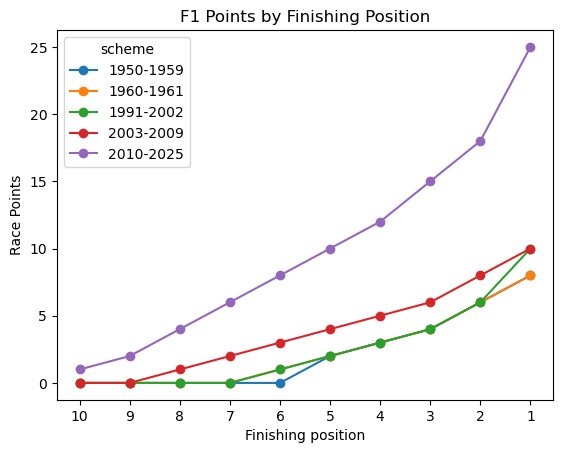

In [12]:
race = df[df["table"] == "race"].copy()

wide = race.pivot(index="position", columns="scheme", values="points").sort_index()

# Decide how to handle positions a scheme doesn't pay:
# Fill with 0 makes lines drop to 0 after the last paying position.
wide = wide.fillna(0)

#force plot to include all values 1-10
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax = wide.plot(marker="o")  # pandas uses matplotlib under the hood
ax.set_xticks(wide.index)      # <-- force all x values
ax.set_xticklabels(wide.index)
ax.set_xlabel("Finishing position")
ax.set_ylabel("Race Points")
ax.set_title("F1 Points by Finishing Position")
ax.invert_xaxis()  # optional: position 1 on left is typical; remove if you prefer
plt.show()